In [1]:
# Naive Bayes Classifier

# Importing the libraries
import numpy as np
import pandas as pd

In [15]:
# Importing the dataset
df = pd.read_csv(r"D:\Meta scifor\Machine Learning\Datasets\Advertisements.csv")


In [16]:
df.info()  #displays the column names, null values and datatype of the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [17]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
df.isna().sum() #checking for null values in the dataset

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
df.describe() #descriptive statistics information

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [21]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [22]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:, 4].values #Declaring X and y variables

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

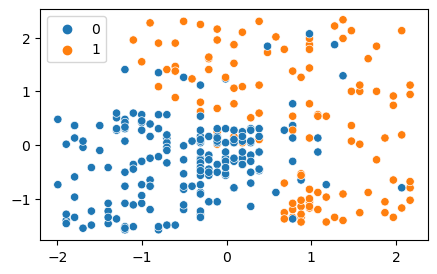

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 3))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                );

In [27]:
# Fitting SVM to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [30]:
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [32]:
from sklearn.metrics import accuracy_score, recall_score,precision_score

In [33]:
print(accuracy_score(y_test,y_pred))

0.9


In [34]:
print(precision_score(y_test,y_pred))

0.8928571428571429


In [35]:
print(recall_score(y_test,y_pred))

0.78125
